# Logistic Classification

In [1]:
import tensorflow as tf

# For drawing sigmoid function
import numpy as np
import matplotlib.pyplot as plt
import math

### 1. Binaray classification
__Binary__ or __binomial classification__ is the task of classifying the elements of a given set into two groups (predicting which group each one belongs to) 
  on the basis of a classification rule.  
The __Logistic Classifiaction__ is the go-to method for binary classification problem

In [2]:
# Sample data
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [3]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]),name='biaas')

### 2. Hypothesis: Sigmoid function(Logistic function)
 - #### We need to change the old hypothesis function: $$Z = XW+b$$  
 X: training input data, W: weight, b:  bias  
 This function can generate output values of extremely higher than 1 or lower than 0, so this fuction is not fit with the binary classification 
   

 - #### New Hypothesis function: $$H(Z) ={1\over(1+e^{-z})}$$
 Z means the old hypothesis function. This shape is decribedd below
 This function allow all values transform into [-1,1]
 This new hypothesis function is called "sigmoid" or "Logistic"
 - #### True if the hypothesis > 0.5 else False

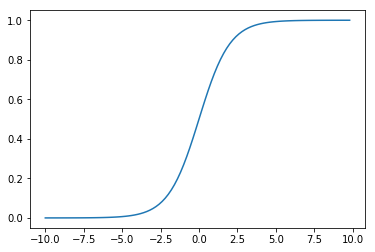

In [4]:
## -- Sample code for sigmoid function
def sigmoid(x):
    a=[]
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

In [5]:
hypothesis = tf.sigmoid(tf.matmul(X,W)+b)

### 3. Loss function
 - #### We also need to change the old loss function:$$ loss(w) = \frac{1}{m} \sum_{i=1}^m (H(x^i)-y^i)^2$$
 When you use the Gradient Descent method, this function makes irregular shape( It contains many local holes ) because the new hypothesis function is non-linear. Threrfore you may be traped  in those holes and output wrong training results
 

 - New loss fuction: $$loss(w) = \frac{1}{m} \sum_{i=1}^m C(H(x),y)$$ 

$$C(H(x),y)=\left\{\begin{matrix} -log(H(x)), & \mbox{if }y\mbox{ =1} \\ -log(1-H(x)), & \mbox{if }y\mbox{ =0} \end{matrix}\right.$$

 - This function is simply integrated as one formula:   
   
   $$C(H(x),y) = -ylog(H(x))-(1-y)log(1-H(x))$$

In [6]:
loss = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

# Accuracy and Prediction(T or F)
# tf.cast(True,dtype=float32):  (True) -> (1.0)
# Chainge the type for calculating accuracy
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [7]:
# Launch graph
with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        loss_val, _ = sess.run([loss,train],feed_dict={X: x_data, Y: y_data})
        if step % 1000 ==0:
            print(step, loss_val)
    print("#######Training end########")
    
    #Accuracy report
    h,c,a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

(0, 0.69791764)
(1000, 0.36121324)
(2000, 0.30667743)
(3000, 0.26763287)
(4000, 0.23681124)
(5000, 0.21200012)
(6000, 0.19171958)
(7000, 0.17490049)
(8000, 0.16076355)
(9000, 0.14873514)
(10000, 0.13838775)
#######Training end########
('\nHypothesis: ', array([[0.02621015],
       [0.15221362],
       [0.28239393],
       [0.79184455],
       [0.94597614],
       [0.98233783]], dtype=float32), '\nCorrect (Y): ', array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32), '\nAccuracy: ', 1.0)
